In [64]:
# loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [65]:
#loading the dataset
data = pd.read_csv(r"D:\projects\datasets\airbnb.csv", encoding_errors='ignore')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [66]:
#Getting familiarized with the dataset

data.shape

(20770, 22)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [68]:
#checking the null values
data.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64

In [69]:
#as we cant fix them, justing them all
data.dropna(inplace= True)
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [70]:
#checking duplicates and dropping them
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [71]:
#statistical summery
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.072400e+04,2.072400e+04,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000
mean,3.037299e+17,1.749996e+08,40.726843,-73.939155,187.732195,28.566396,42.592646,1.257529,18.840041,205.940938,10.844480,1.723412
std,3.902175e+17,1.725778e+08,0.060320,0.061442,1023.539393,33.560272,73.534712,1.905221,70.944874,135.101383,21.359681,1.211237
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.710766e+07,2.043733e+07,40.684150,-73.980760,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.994511e+07,1.089827e+08,40.722937,-73.949599,125.000000,30.000000,14.000000,0.650000,2.000000,214.000000,3.000000,1.000000
75%,7.220000e+17,3.144602e+08,40.763132,-73.917430,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [72]:
data.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [73]:
#type casting 
# changing the datatype of id and host_id to object

data['id'] = data['id'].astype(object)
data['id'].dtype


dtype('O')

In [74]:
data['host_id'] = data['host_id'].astype(object)
data['host_id'].dtype

dtype('O')

#### **Exploratory Data Analysis**

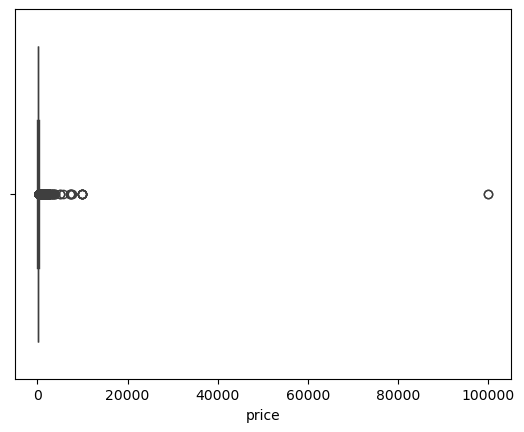

In [75]:
#identifing outliers in price

sns.boxplot(data= data, x= 'price')
plt.show()

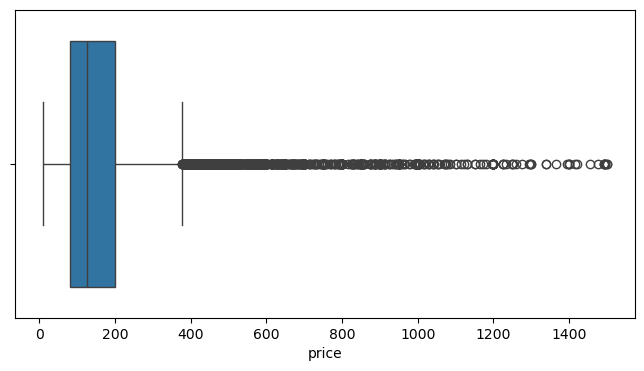

In [76]:
# for better results and graph lets take price lessthan 1500
df = data[data['price']<1500]
#identifying the outliers in the price
plt.figure(figsize=(8,4))
sns.boxplot(data=df , x= 'price')
plt.show()

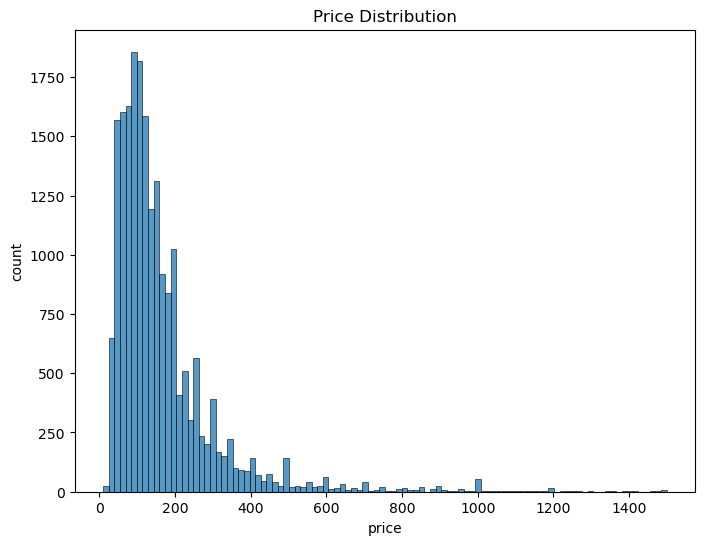

In [79]:
#price distribution
plt.figure(figsize=(8,6))
sns.histplot(data=df , x= 'price', bins=100)
plt.xlabel('price')
plt.ylabel('count')
plt.title('Price Distribution')
plt.show()

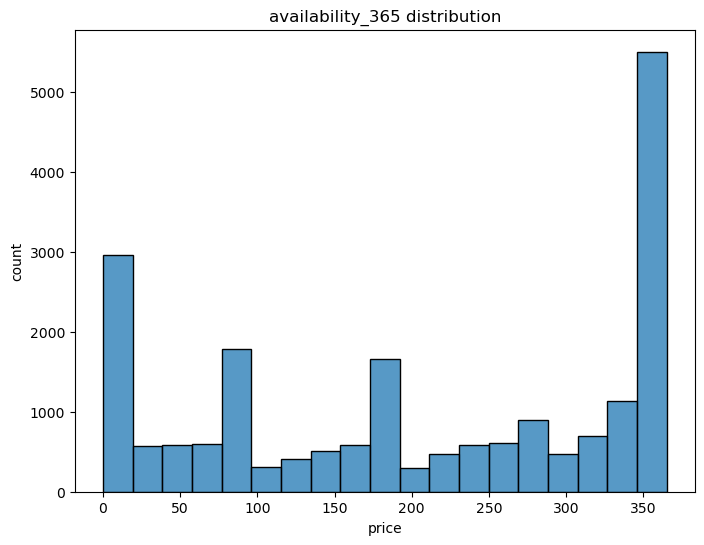

In [78]:
#availability_365 distribution
plt.figure(figsize=(8,6))
sns.histplot(data= df , x= 'availability_365')

plt.xlabel('price')
plt.ylabel('count')
plt.title('availability_365 distribution')
plt.show()

In [ ]:
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx            107.990506
Brooklyn         155.138317
Manhattan        204.146014
Queens           121.681939
Staten Island    118.780069
Name: price, dtype: float64

In [82]:
#feature enginnering
df['price per bed']= df['price']/df['beds']

C:\Users\Hemanth\AppData\Local\Temp\ipykernel_516\2865363111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price per bed']= df['price']/df['beds']


In [84]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price per bed
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,55.0
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139.0,364.0,2.0,No License,4.67,2,1,1,144.0
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1,93.5
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2.0,363.0,12.0,No License,4.64,1,1,1,120.0
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1,85.0


In [83]:
df.groupby('neighbourhood_group')['price per bed'].mean()

neighbourhood_group
Bronx             74.713639
Brooklyn          99.788493
Manhattan        138.708057
Queens            76.336210
Staten Island     67.728101
Name: price per bed, dtype: float64

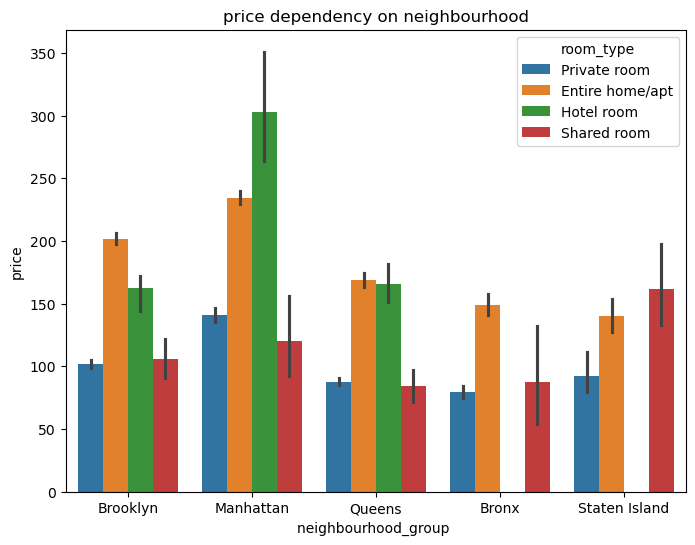

In [86]:
# price dependency on neighbourhood
#price distribution
plt.figure(figsize=(8,6))
sns.barplot(data=df , x= 'neighbourhood_group'  ,y= 'price', hue= 'room_type')
plt.xlabel('neighbourhood_group ')
plt.ylabel('price')
plt.title('price dependency on neighbourhood')
plt.show()

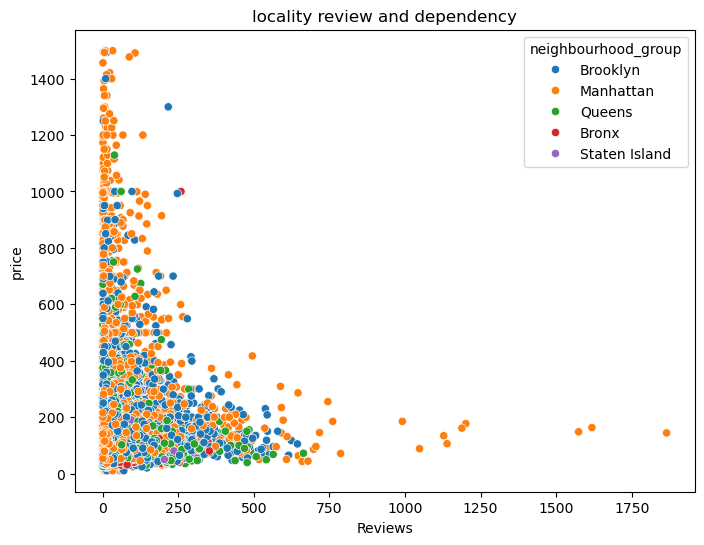

In [92]:
#locality review and dependency

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='number_of_reviews',y='price' , hue='neighbourhood_group')
plt.ylabel('price')
plt.xlabel('Reviews')
plt.title('locality review and dependency')
plt.show()

<Figure size 1000x1000 with 0 Axes>

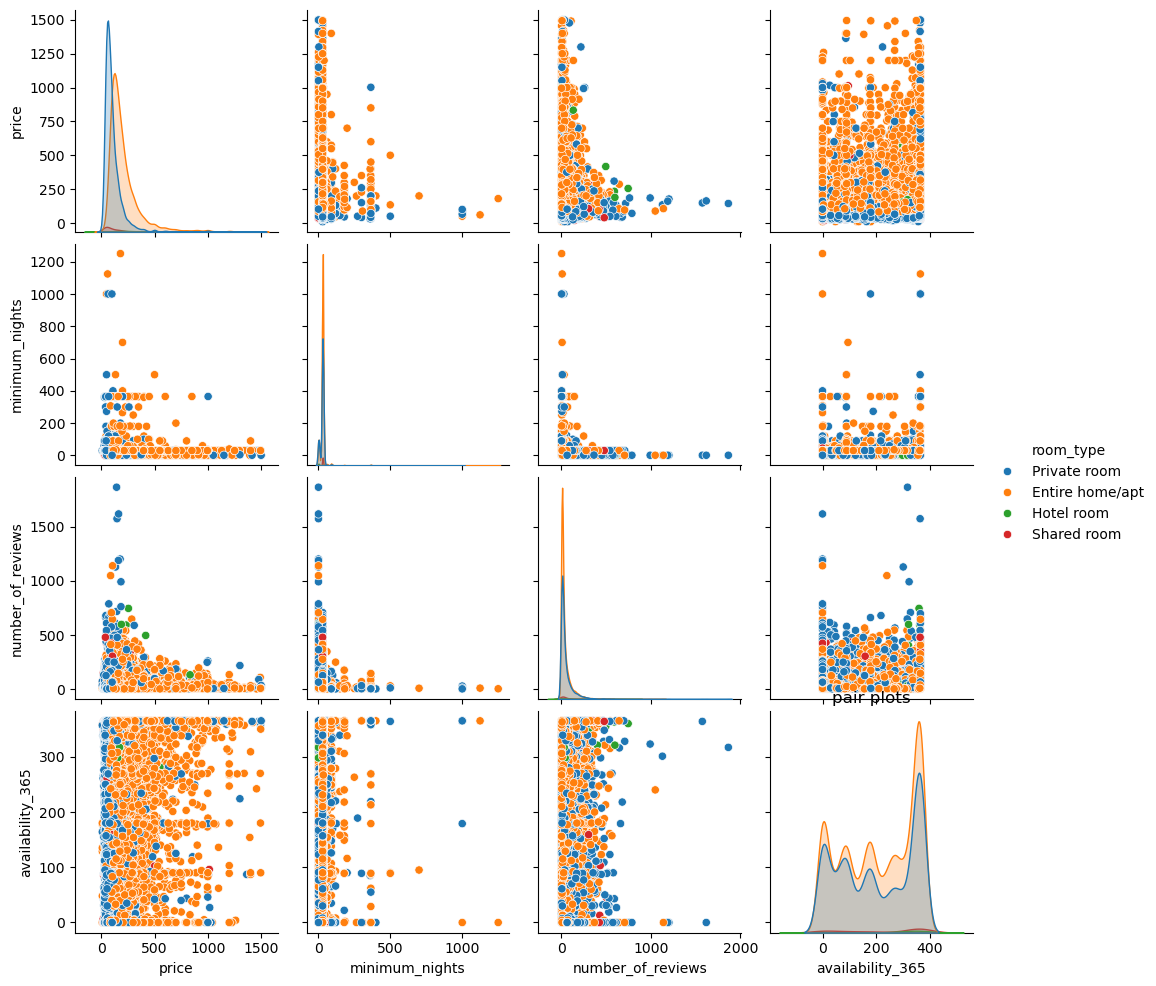

In [94]:
#pair plots

plt.figure(figsize=(10,10))

sns.pairplot(data=df,
              vars=['price',
                     'minimum_nights',
                    'number_of_reviews',
                    'availability_365'], 
                    hue='room_type')
plt.title('pair plots')
plt.show()

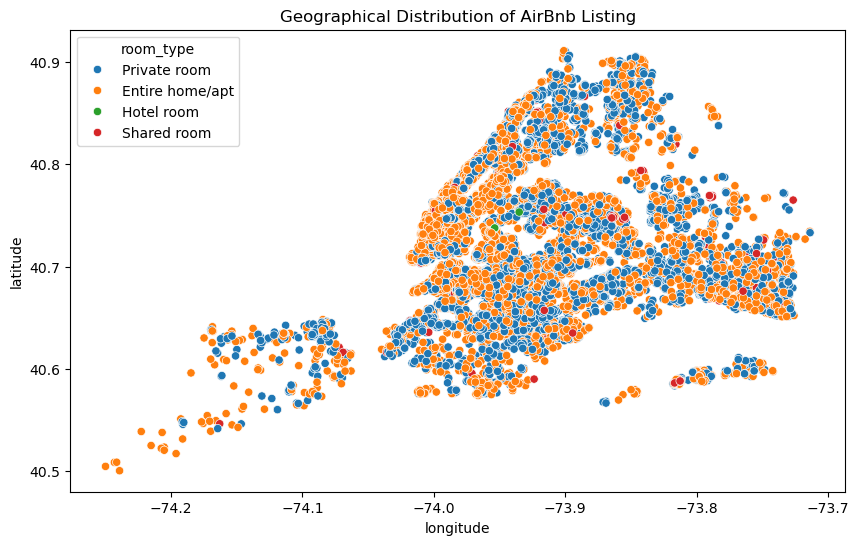

In [97]:
#Geographical Distribution of AirBnb Listing
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type')
plt.title("Geographical Distribution of AirBnb Listing")
plt.show()

In [98]:
# heat map - correlation of one variable with others for numerical column

correlation = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'beds']].corr()
correlation

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,beds
latitude,1.000000,0.047369,0.012686,0.004590,-0.047953,-0.041673,-0.005941,-0.071753
longitude,0.047369,1.000000,-0.193728,0.023890,0.004820,0.041720,0.063523,0.041832
price,0.012686,-0.193728,1.000000,-0.044635,-0.043533,-0.012775,0.048036,0.415278
minimum_nights,0.004590,0.023890,-0.044635,1.000000,-0.059049,-0.122509,0.035466,-0.025852
number_of_reviews,-0.047953,0.004820,-0.043533,-0.059049,1.000000,0.631005,-0.049656,0.040071
reviews_per_month,-0.041673,0.041720,-0.012775,-0.122509,0.631005,1.000000,-0.040116,0.053496
availability_365,-0.005941,0.063523,0.048036,0.035466,-0.049656,-0.040116,1.000000,0.065985
beds,-0.071753,0.041832,0.415278,-0.025852,0.040071,0.053496,0.065985,1.000000


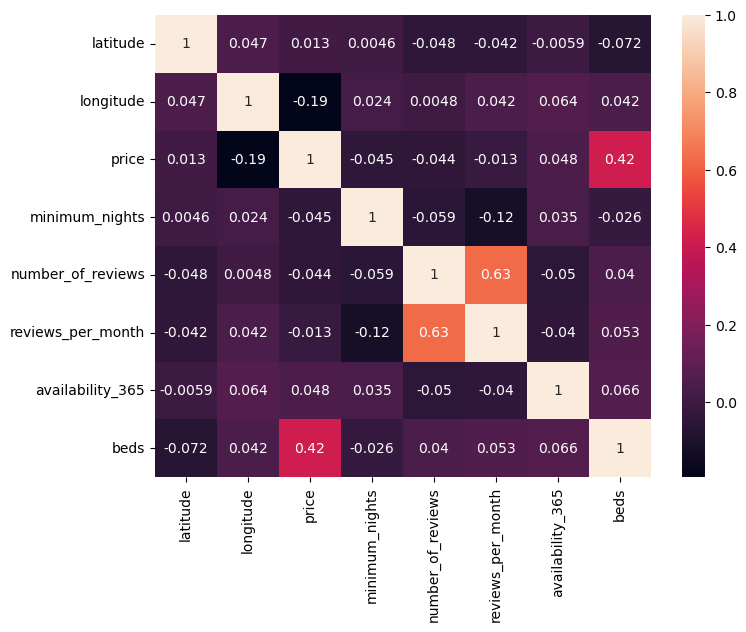

In [99]:


plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation, annot=True)
plt.show()
